<a href="https://colab.research.google.com/github/Chaitra-B-V/ANN-LSH/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSH

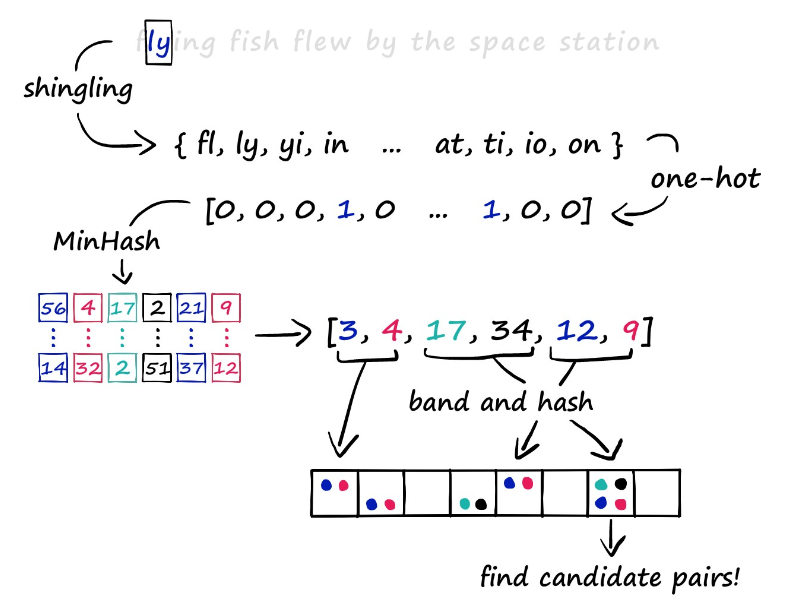

In [ ]:

def gen_shingles(text: str, k: int):
  shingles = []

  for i in range(len(text) - k + 1):
    shingle = text[i:i + k]
    shingles.append(shingle)

  return set(shingles)

In [ ]:
p1 = 'opinion on ChatGPT'
p2 = 'ChatGPT conversations'
p3 = 'scans text across the internet'
k = 2

text1 = gen_shingles(p1, k)
text2 = gen_shingles(p2, k)
text3 = gen_shingles(p3, k)

text1, text2, text3 # set is an unordered collection

({' C',
  ' o',
  'Ch',
  'GP',
  'PT',
  'at',
  'ha',
  'in',
  'io',
  'n ',
  'ni',
  'on',
  'op',
  'pi',
  'tG'},
 {' c',
  'Ch',
  'GP',
  'PT',
  'T ',
  'at',
  'co',
  'er',
  'ha',
  'io',
  'ns',
  'nv',
  'on',
  'rs',
  'sa',
  'tG',
  'ti',
  've'},
 {' a',
  ' i',
  ' t',
  'ac',
  'an',
  'ca',
  'cr',
  'e ',
  'er',
  'et',
  'ex',
  'he',
  'in',
  'ne',
  'ns',
  'nt',
  'os',
  'rn',
  'ro',
  's ',
  'sc',
  'ss',
  't ',
  'te',
  'th',
  'xt'})

In [ ]:

vocab = text1.union(text2).union(text3)
vocab

{' C',
 ' a',
 ' c',
 ' i',
 ' o',
 ' t',
 'Ch',
 'GP',
 'PT',
 'T ',
 'ac',
 'an',
 'at',
 'ca',
 'co',
 'cr',
 'e ',
 'er',
 'et',
 'ex',
 'ha',
 'he',
 'in',
 'io',
 'n ',
 'ne',
 'ni',
 'ns',
 'nt',
 'nv',
 'on',
 'op',
 'os',
 'pi',
 'rn',
 'ro',
 'rs',
 's ',
 'sa',
 'sc',
 'ss',
 't ',
 'tG',
 'te',
 'th',
 'ti',
 've',
 'xt'}

In [ ]:

text1_enc = [1 if s in text1 else 0 for s in vocab]
text2_enc = [1 if s in text2 else 0 for s in vocab]
text3_enc = [1 if s in text3 else 0 for s in vocab]

text1_enc

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [ ]:

nums = list(range(1, len(text1_enc) + 1))
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [ ]:
import random
from random import shuffle

shuffle(nums)
random_nums = nums
random_nums

[16,
 10,
 39,
 2,
 44,
 15,
 38,
 1,
 14,
 34,
 5,
 43,
 42,
 3,
 29,
 27,
 9,
 33,
 22,
 28,
 21,
 19,
 35,
 46,
 20,
 36,
 31,
 24,
 23,
 12,
 32,
 26,
 41,
 18,
 25,
 47,
 6,
 4,
 37,
 48,
 40,
 30,
 13,
 11,
 17,
 7,
 45,
 8]

In [ ]:
def create_hash(size):
  hash = list(range(1, len(vocab) + 1))
  shuffle(hash)
  return hash

In [ ]:

def build_minhash_func(vocab_size: int, nbits: int):
    hashes = []
    for i in range(nbits):
        hashes.append(create_hash(vocab_size))
    return hashes

# create 20 minhash vectors
minhash = build_minhash_func(len(vocab), 20)
#minhash

In [ ]:
def create_sig(onehot_enc: list):
    # To create signatures
    signature = []
    for func in minhash:
        for i in range(1, len(vocab)+1):
            idx = func.index(i)
            if onehot_enc[idx] == 1:
                signature.append(idx)
                break
    return signature

In [ ]:

text1_sig = create_sig(text1_enc)
text2_sig = create_sig(text2_enc)
text3_sig = create_sig(text3_enc)

print(text1_sig)
print(text2_sig)

[0, 9, 18, 12, 2, 33, 0, 18, 18, 12, 34, 33, 44, 9, 9, 13, 35, 8, 0, 34]
[6, 17, 34, 12, 30, 33, 30, 40, 0, 22, 34, 33, 6, 12, 40, 13, 22, 41, 17, 34]


In [ ]:

def jaccard(a, b):
  return len(a.intersection(b)) / len(a.union(b))
     

In [ ]:

jaccard(text1, text2), jaccard(set(text1_sig), set(text2_sig))

(0.32, 0.29411764705882354)

In [ ]:

jaccard(text1, text3), jaccard(set(text1_sig), set(text3_sig))
     

(0.025, 0.0)

In [ ]:

jaccard(text2, text3), jaccard(set(text2_sig), set(text3_sig))

(0.047619047619047616, 0.041666666666666664)

In [ ]:

def fill_buckets(signatures, bands):
  n = len(signatures) // bands   #numbers of sig in each bucket
  #print(n)
  bucket = [] # List of lists
  i = 0
  while i < len(signatures):
    bucket.append(signatures[i: i + n]) #add n sig to buckets
    i += n
  return bucket

In [ ]:

band_text1 = fill_buckets(text1_sig, 10)
band_text2 = fill_buckets(text2_sig, 10)
band_text3 = fill_buckets(text3_sig, 10)

band_text1, band_text2, band_text3
     

([[0, 9],
  [18, 12],
  [2, 33],
  [0, 18],
  [18, 12],
  [34, 33],
  [44, 9],
  [9, 13],
  [35, 8],
  [0, 34]],
 [[6, 17],
  [34, 12],
  [30, 33],
  [30, 40],
  [0, 22],
  [34, 33],
  [6, 12],
  [40, 13],
  [22, 41],
  [17, 34]],
 [[20, 45],
  [39, 1],
  [19, 38],
  [21, 21],
  [27, 42],
  [25, 39],
  [45, 5],
  [32, 1],
  [45, 41],
  [46, 32]])

In [ ]:

for text1, text2 in zip(band_text1, band_text2):
  if text1 == text2:
    print("Candidadte Pairs = {},{}".format(text1, text2))
    break
     

Candidadte Pairs = [34, 33],[34, 33]


In [ ]:

for text2, text3 in zip(band_text2, band_text3):
  if text2 == text3:
    print("Candidadte Pairs = {},{}".format(text2, text3))
    break

In [ ]:
for text3, text1 in zip(band_text3, band_text1):
  if text3 == text1:
    print("Candidate Pairs = {},{}".format(text3, text1))
    break

LSH Random Projections

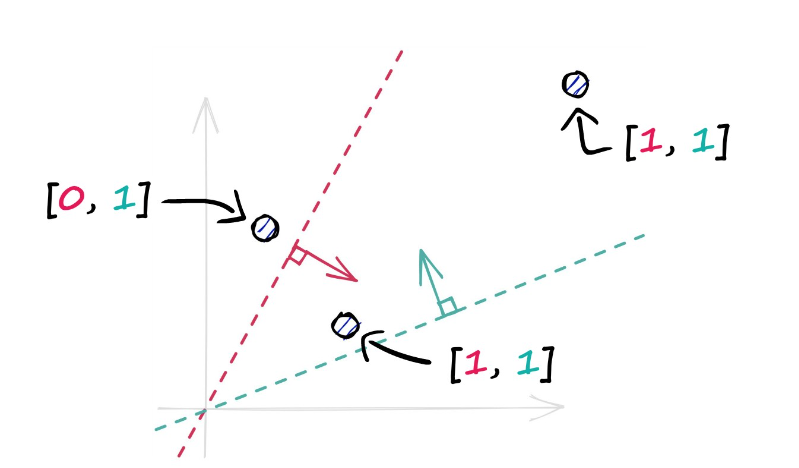

In [ ]:
nbits = 5  # number of hyperplanes and binary vals to produce
d = 2  # vector dimensions

In [ ]:
import numpy as np
# create a set of 4 hyperplanes, with 2 dimensions
plane_norms = np.random.rand(nbits, d) - .5
plane_norms

array([[-0.49478414, -0.39888002],
       [-0.09650003,  0.16644659],
       [-0.24261198,  0.39399681],
       [-0.01531201, -0.34397656],
       [ 0.13296375, -0.0907029 ]])

In [ ]:
a = np.asarray([1, 2])
b = np.asarray([2, 5])
c = np.asarray([3, 2])

In [ ]:
a_dot = np.dot(a, plane_norms.T)
b_dot = np.dot(b, plane_norms.T)
c_dot = np.dot(c, plane_norms.T)
a_dot

array([-1.29254418,  0.23639315,  0.54538165, -0.70326513, -0.04844205])

In [ ]:
# we know that a positive dot product == +ve side of hyperplane
# and negative dot product == -ve side of hyperplane
a_dot = a_dot > 0
b_dot = b_dot > 0
c_dot = c_dot > 0
a_dot

array([False,  True,  True, False, False])

In [ ]:
# convert our boolean arrays to int arrays to make bucketing
# easier (although is okay to use boolean for Hamming distance)
a_dot = a_dot.astype(int)
b_dot = b_dot.astype(int)
c_dot = c_dot.astype(int)
a_dot

array([0, 1, 1, 0, 0])

In [ ]:
b_dot

array([0, 1, 1, 0, 0])

In [ ]:
vectors = [a_dot, b_dot, c_dot]
buckets = {}
i = 0

for i in range(len(vectors)):
    # convert from array to string
    hash_str = ''.join(vectors[i].astype(str))
    # create bucket if it doesn't exist
    if hash_str not in buckets.keys():
        buckets[hash_str] = []
    # add vector position to bucket
    buckets[hash_str].append(i)

print(buckets)

{'01100': [0, 1], '01101': [2]}


Product Quantization

In [ ]:
!apt install libomp-dev
!pip install faiss-cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.0 MB 5.2 MB/s 


In [ ]:
import pickle
import faiss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data():
    with open('/content/drive/MyDrive/movies.pickle', 'rb') as f:
        data = pickle.load(f)
    return data

data = load_data()
data

{'name': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'vector': array([[-0.01780608, -0.14265831,  0.10308606, ...,  0.09659795,
         -0.17529577, -0.03061521],
        [-0.03357764,  0.16418771,  0.21801303, ...,  0.16502103,
         -0.09166156,  0.05047869],
        [-0.2761452 , -0.01991325, -0.04969981, ...,  0.0258275 ,
         -0.08328608, -0.0152858 ],
        ...,
        [ 0.05142734, -0.01683608, -0.20441587, ...,  0.00045828,
          0.14679626,  0.2462584 ],
        [ 0.04491899, -0.02819411, -0.09472758, ..., -0.02152078,
          0.16223577,  0.19897607],
        [ 0.02531924,  0.03099714,  0.06437534, ..., -0.07260127,
          0.0467432 ,  0.07893164]], dtype=float32)}

Implementing Product quantization with faiss:

Vector is represented by 8 sub-vectors, Inverted index are created for efficient searching

In [ ]:
class IVPQIndex():
    def __init__(self, vectors, labels):
        self.dimension = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels


    def build(self, number_of_partition=8, search_in_x_partitions=2, subvector_size=8):
        quantizer = faiss.IndexFlatL2(self.dimension)
        self.index = faiss.IndexIVFPQ(quantizer, 
                                      self.dimension, 
                                      number_of_partition, 
                                      search_in_x_partitions, 
                                      subvector_size)
        self.index.train(self.vectors)
        self.index.add(self.vectors)
        
    def query(self, vectors, k=10):
        distances, indices = self.index.search(vectors, k) 
        return [self.labels[i] for i in indices[0]]

In [ ]:

index = IVPQIndex(data["vector"], data["name"])
index.build()
     

In [ ]:

movie_index = 249
movie_vector = data['vector'][movie_index:movie_index+1]
print(f"The most similar movies to {data['name'][movie_index]} are:")
index.query(movie_vector)

The most similar movies to Fifth Element, The (1997) are:


['Fifth Element, The (1997)',
 'Men in Black (1997)',
 'Breakdown (1997)',
 'Lost World: Jurassic Park, The (1997)',
 'Con Air (1997)',
 'Chasing Amy (1997)',
 'Private Parts (1997)',
 'Austin Powers: International Man of Mystery (1997)',
 'Face/Off (1997)',
 'Grosse Pointe Blank (1997)']

Exhaustive Search

In [ ]:
class BruteForceIndex():
    def __init__(self, vectors, labels):
        self.vectors = vectors.astype('float32')
        self.labels = labels
        self.index = faiss.IndexFlatL2(vectors.shape[1])
        self.index.add(self.vectors)
        
    def query(self, vectors, k=10):
        distances, indices = self.index.search(vectors, k) 
        return [self.labels[i] for i in indices[0]]

In [ ]:

index = BruteForceIndex(data["vector"], data["name"])

In [ ]:
movie_vector, movie_name = data['vector'][249:250], data['name'][249]
simlar_movies_names = '\n* '.join(index.query(movie_vector))
print(f"The most similar movies to {movie_name} are:\n* {simlar_movies_names}")

The most similar movies to Fifth Element, The (1997) are:
* Fifth Element, The (1997)
* Men in Black (1997)
* Face/Off (1997)
* Con Air (1997)
* Austin Powers: International Man of Mystery (1997)
* Private Parts (1997)
* Grosse Pointe Blank (1997)
* Rumble in the Bronx (1995)
* Romy and Michele's High School Reunion (1997)
* Mars Attacks! (1996)


Trees and Forests

In [ ]:
!pip install annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 4.9 MB/s 
  Created wheel for annoy: filename=annoy-1.17.1-cp38-cp38-linux_x86_64.whl size=394061 sha256=93f447aed620c19eff46bb207d55b700c4b786504ef46ee0d4ca3c0a815f87c3
  Stored in directory: /root/.cache/pip/wheels/f9/93/19/30511c4a9ae6b4937455a134c34a39e13943e2c6f46fcd2ed2
Successfully built annoy


In [ ]:

import annoy

class AnnoyIndex():
    def __init__(self, vectors, labels):
        self.dimention = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels


    def build(self, number_of_trees=5):
        self.index = annoy.AnnoyIndex(self.dimention)
        for i, vec in enumerate(self.vectors):
            self.index.add_item(i, vec.tolist())
        self.index.build(number_of_trees)
        
    def query(self, vector, k=10):
        indices = self.index.get_nns_by_vector(vector.tolist(), k)
        return [self.labels[i] for i in indices]

In [ ]:

index = AnnoyIndex(data["vector"], data["name"])
index.build()
     

<ipython-input-68-7a85ecbad9b0>:11: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  self.index = annoy.AnnoyIndex(self.dimention)


In [ ]:

movie_vector, movie_name = data['vector'][90], data['name'][90]
simlar_movies_names = '\n* '.join(index.query(movie_vector))
print(f"The most similar movies to {movie_name} are:\n* {simlar_movies_names}")

The most similar movies to Nightmare Before Christmas, The (1993) are:
* Nightmare Before Christmas, The (1993)
* Beauty and the Beast (1991)
* Fantasia (1940)
* Heavy Metal (1981)
* Snow White and the Seven Dwarfs (1937)
* Lion King, The (1994)
* Pink Floyd - The Wall (1982)
* Sound of Music, The (1965)
* Monty Python's Life of Brian (1979)
* Sirens (1994)


HNSW

In [ ]:
!pip install nmslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.4 MB 5.3 MB/s 
     |████████████████████████████████| 188 kB 42.3 MB/s 


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:

digits = load_digits(n_class = 9)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape
     

(1617, 64)

In [ ]:

X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  6.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:

from sklearn.manifold import TSNE
tsne_2 = TSNE()
data_embeddings_tsne_2 = tsne_2.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:

data_embeddings_tsne_2.shape
     

(1617, 2)

In [ ]:

data_embeddings_tsne_2

array([[-24.759209 , -43.448666 ],
       [  5.043101 , -13.569837 ],
       [ -3.3770204,  18.87243  ],
       ...,
       [-18.245546 , -48.565376 ],
       [  1.0967039,   9.102067 ],
       [  5.7756834,  10.422081 ]], dtype=float32)

In [ ]:

import nmslib

hnsw_index = nmslib.init(method = 'hnsw', space = 'cosinesimil')
hnsw_index.addDataPointBatch(data_embeddings_tsne_2)
hnsw_index.createIndex({'post': 2})
y[10]

1

In [ ]:

hnsw_output = hnsw_index.knnQuery(data_embeddings_tsne_2[10], k = 10)
hnsw_output_list = [y[i] for i in hnsw_output[0]]
hnsw_output_list

[1, 1, 8, 1, 1, 1, 1, 1, 1, 1]